# RNN Stock analysis

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Read the Dataset

read each day as observation 

In [2]:
import pandas as pd

well = pd.read_csv("data/WFC.csv")

well.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-22,50.630001,51.110001,49.730000,50.340000,48.873283,28549400
1,2021-11-23,50.709999,51.740002,50.700001,51.400002,49.902393,28024400
2,2021-11-24,51.509998,51.740002,51.180000,51.310001,49.815018,18901900
3,2021-11-26,49.099998,49.099998,47.689999,48.430000,47.018929,29919300
4,2021-11-29,49.669998,49.770000,48.310001,49.160000,47.727661,27677000


In [3]:
well

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-22,50.630001,51.110001,49.730000,50.340000,48.873283,28549400
1,2021-11-23,50.709999,51.740002,50.700001,51.400002,49.902393,28024400
2,2021-11-24,51.509998,51.740002,51.180000,51.310001,49.815018,18901900
3,2021-11-26,49.099998,49.099998,47.689999,48.430000,47.018929,29919300
4,2021-11-29,49.669998,49.770000,48.310001,49.160000,47.727661,27677000
...,...,...,...,...,...,...,...
349,2023-04-14,39.750000,40.509998,39.119999,39.639999,39.639999,40936900
350,2023-04-17,39.830002,41.299999,39.560001,41.299999,41.299999,31445100
351,2023-04-18,41.209999,42.060001,41.139999,41.869999,41.869999,27892300
352,2023-04-19,41.970001,42.410000,41.790001,42.240002,42.240002,23310500


In [4]:
well = well[:100]

In [5]:
well

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-22,50.630001,51.110001,49.730000,50.340000,48.873283,28549400
1,2021-11-23,50.709999,51.740002,50.700001,51.400002,49.902393,28024400
2,2021-11-24,51.509998,51.740002,51.180000,51.310001,49.815018,18901900
3,2021-11-26,49.099998,49.099998,47.689999,48.430000,47.018929,29919300
4,2021-11-29,49.669998,49.770000,48.310001,49.160000,47.727661,27677000
...,...,...,...,...,...,...,...
95,2022-04-08,48.000000,48.889999,47.930000,48.730000,47.522614,23659800
96,2022-04-11,48.939999,50.189999,48.919998,49.330002,48.107742,27041000
97,2022-04-12,49.680000,49.900002,48.000000,48.419998,47.220287,25791900
98,2022-04-13,47.540001,48.619999,47.450001,48.540001,47.337318,20645300


In [6]:
#Drop the columns we don't need

well = well.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [7]:
well

,Date,Close
0,2021-11-22,50.340000
1,2021-11-23,51.400002
2,2021-11-24,51.310001
3,2021-11-26,48.430000
4,2021-11-29,49.160000
...,...,...
95,2022-04-08,48.730000
96,2022-04-11,49.330002
97,2022-04-12,48.419998
98,2022-04-13,48.540001


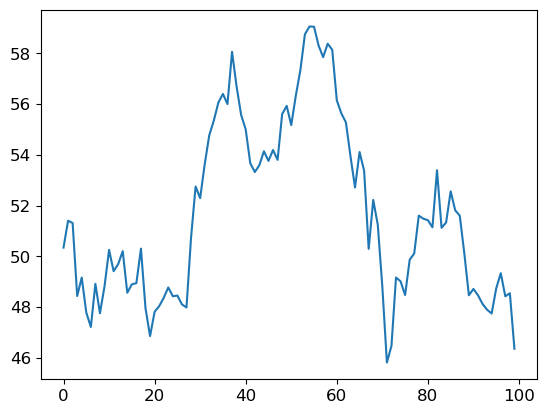

In [8]:
#Plot temp

plt.plot(well['Close'])
plt.show()

# Data Cleanup

In [9]:
# Remove all null values

well = well.dropna().reset_index(drop=True)

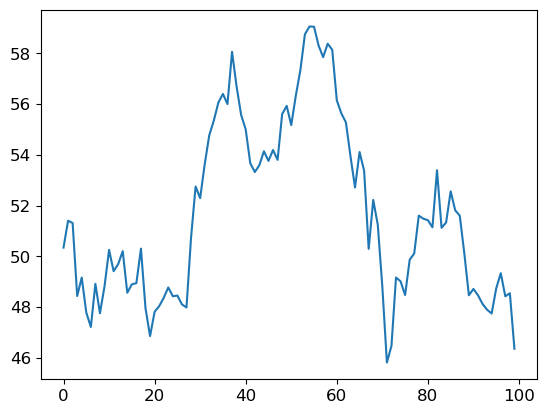

In [10]:
plt.plot(well['Close'])
plt.show()

## RESHAPE the data set!

In [11]:
well.shape

(100, 2)

In [12]:
well.shape[0]/10

10.0

In [13]:
well.groupby(['Date']).count()

,Close
Date,
2021-11-22,1
2021-11-23,1
2021-11-24,1
2021-11-26,1
2021-11-29,1
...,...
2022-04-08,1
2022-04-11,1
2022-04-12,1


In [14]:
well = np.array(well['Close']).reshape(10,10)

well

array([[50.34    , 51.400002, 51.310001, 48.43    , 49.16    , 47.779999,
        47.209999, 48.91    , 47.75    , 48.810001],
       [50.25    , 49.41    , 49.689999, 50.200001, 48.560001, 48.889999,
        48.939999, 50.299999, 47.950001, 46.849998],
       [47.810001, 48.029999, 48.360001, 48.77    , 48.419998, 48.450001,
        48.099998, 47.98    , 50.73    , 52.75    ],
       [52.290001, 53.630001, 54.77    , 55.349998, 56.060001, 56.400002,
        56.      , 58.060001, 56.689999, 55.57    ],
       [55.      , 53.669998, 53.32    , 53.59    , 54.139999, 53.759998,
        54.189999, 53.799999, 55.599998, 55.93    ],
       [55.169998, 56.330002, 57.330002, 58.75    , 59.060001, 59.049999,
        58.310001, 57.849998, 58.380001, 58.139999],
       [56.150002, 55.630001, 55.279999, 53.950001, 52.709999, 54.110001,
        53.369999, 50.290001, 52.220001, 51.240002],
       [48.790001, 45.810001, 46.459999, 49.16    , 49.009998, 48.470001,
        49.860001, 50.110001, 51.5999

In [15]:
# Convert to dataframe


well_df = pd.DataFrame(well, columns=np.arange(0,10,1))

well_df

,0,1,2,3,4,5,6,7,8,9
0,50.340000,51.400002,51.310001,48.430000,49.160000,47.779999,47.209999,48.910000,47.750000,48.810001
1,50.250000,49.410000,49.689999,50.200001,48.560001,48.889999,48.939999,50.299999,47.950001,46.849998
2,47.810001,48.029999,48.360001,48.770000,48.419998,48.450001,48.099998,47.980000,50.730000,52.750000
3,52.290001,53.630001,54.770000,55.349998,56.060001,56.400002,56.000000,58.060001,56.689999,55.570000
4,55.000000,53.669998,53.320000,53.590000,54.139999,53.759998,54.189999,53.799999,55.599998,55.930000
5,55.169998,56.330002,57.330002,58.750000,59.060001,59.049999,58.310001,57.849998,58.380001,58.139999
6,56.150002,55.630001,55.279999,53.950001,52.709999,54.110001,53.369999,50.290001,52.220001,51.240002
7,48.790001,45.810001,46.459999,49.160000,49.009998,48.470001,49.860001,50.110001,51.599998,51.480000
8,51.419998,51.139999,53.389999,51.119999,51.330002,52.560001,51.810001,51.599998,50.110001,48.459999
9,48.709999,48.459999,48.119999,47.889999,47.740002,48.730000,49.330002,48.419998,48.540001,46.349998


# Reshape for Standardizing Data

In [16]:
# Let's create a single sequence (i.e., feature) for standardization

well_1feature = np.array(well_df).ravel().reshape(-1,1)

well_1feature.shape

(100, 1)

In [17]:
well_1feature

array([[50.34    ],
       [51.400002],
       [51.310001],
       [48.43    ],
       [49.16    ],
       [47.779999],
       [47.209999],
       [48.91    ],
       [47.75    ],
       [48.810001],
       [50.25    ],
       [49.41    ],
       [49.689999],
       [50.200001],
       [48.560001],
       [48.889999],
       [48.939999],
       [50.299999],
       [47.950001],
       [46.849998],
       [47.810001],
       [48.029999],
       [48.360001],
       [48.77    ],
       [48.419998],
       [48.450001],
       [48.099998],
       [47.98    ],
       [50.73    ],
       [52.75    ],
       [52.290001],
       [53.630001],
       [54.77    ],
       [55.349998],
       [56.060001],
       [56.400002],
       [56.      ],
       [58.060001],
       [56.689999],
       [55.57    ],
       [55.      ],
       [53.669998],
       [53.32    ],
       [53.59    ],
       [54.139999],
       [53.759998],
       [54.189999],
       [53.799999],
       [55.599998],
       [55.93    ],


## Standardize the values

In [18]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

well_std = scaler.fit_transform(well_1feature)

In [19]:
well_reshaped = well_std.reshape(10,10)

well_reshaped.shape

(10, 10)

In [20]:
#Pandas version of the reshaped data

pd.DataFrame(well_reshaped)

,0,1,2,3,4,5,6,7,8,9
0,-0.387838,-0.082544,-0.108465,-0.937942,-0.727693,-1.125151,-1.289318,-0.799696,-1.133791,-0.828497
1,-0.413759,-0.655690,-0.575047,-0.428159,-0.900500,-0.805457,-0.791056,-0.399359,-1.076188,-1.393003
2,-1.116510,-1.053148,-0.958103,-0.840018,-0.940823,-0.932182,-1.032987,-1.067548,-0.275513,0.306273
3,0.173787,0.559724,0.888059,1.055105,1.259595,1.357520,1.242314,1.835621,1.441043,1.118469
4,0.954302,0.571244,0.470440,0.548204,0.706610,0.597165,0.721011,0.608686,1.127109,1.222153
5,1.003263,1.337359,1.625372,2.034349,2.123634,2.120753,1.907624,1.775137,1.927785,1.858661
6,1.285517,1.135750,1.034945,0.651888,0.294752,0.697970,0.484840,-0.402238,0.153626,-0.128626
7,-0.834258,-1.692536,-1.505328,-0.727693,-0.770896,-0.926422,-0.526084,-0.454081,-0.024942,-0.059503
8,-0.076785,-0.157428,0.490601,-0.163188,-0.102705,0.251551,0.035541,-0.024942,-0.454081,-0.929302
9,-0.857299,-0.929302,-1.027227,-1.093470,-1.136671,-0.851539,-0.678730,-0.940823,-0.906261,-1.537010


# Split the Data

In [21]:
from sklearn.model_selection import train_test_split
# if we neede to maintain the ordering of the data, we can use the following code to split the data
#train, test = train_test_split(well_reshaped, test_size=0.3)

split_point = int(len(well_reshaped)*0.7)
train, test = well_reshaped[:split_point], well_reshaped[split_point:]

In [22]:
train

array([[-0.38783799, -0.08254386, -0.1084653 , -0.9379424 , -0.72769307,
        -1.12515099, -1.28931828, -0.79969626, -1.13379109, -0.82849725],
       [-0.41375914, -0.65568987, -0.57504658, -0.42815949, -0.90050045,
        -0.80545681, -0.79105617, -0.39935879, -1.07618824, -1.39300317],
       [-1.11651003, -1.0531478 , -0.958103  , -0.84001805, -0.9408231 ,
        -0.93218185, -1.03298719, -1.06754815, -0.275513  ,  0.30627281],
       [ 0.17378722,  0.55972435,  0.88805863,  1.05510547,  1.2595954 ,
         1.35752004,  1.24231435,  1.83562096,  1.44104288,  1.11846885],
       [ 0.95430157,  0.571244  ,  0.4704401 ,  0.54820355,  0.70661029,
         0.59716515,  0.72101093,  0.60868594,  1.12710866,  1.22215345],
       [ 1.00326317,  1.33735914,  1.62537192,  2.03434949,  2.12363374,
         2.12075304,  1.90762416,  1.77513742,  1.92778505,  1.85866141],
       [ 1.28551684,  1.13574991,  1.03494486,  0.65188844,  0.29475201,
         0.69797048,  0.48484045, -0.40223834

In [23]:
train.shape

(7, 10)

In [24]:
test.shape

(3, 10)

# Create Input and Target values


In [25]:
train_inputs = train[:,:9]


pd.DataFrame(train_inputs)

,0,1,2,3,4,5,6,7,8
0,-0.387838,-0.082544,-0.108465,-0.937942,-0.727693,-1.125151,-1.289318,-0.799696,-1.133791
1,-0.413759,-0.655690,-0.575047,-0.428159,-0.900500,-0.805457,-0.791056,-0.399359,-1.076188
2,-1.116510,-1.053148,-0.958103,-0.840018,-0.940823,-0.932182,-1.032987,-1.067548,-0.275513
3,0.173787,0.559724,0.888059,1.055105,1.259595,1.357520,1.242314,1.835621,1.441043
4,0.954302,0.571244,0.470440,0.548204,0.706610,0.597165,0.721011,0.608686,1.127109
5,1.003263,1.337359,1.625372,2.034349,2.123634,2.120753,1.907624,1.775137,1.927785
6,1.285517,1.135750,1.034945,0.651888,0.294752,0.697970,0.484840,-0.402238,0.153626


## Add one more dimension to make it ready for RNNs

See here for more details: https://keras.io/layers/recurrent/, and https://shiva-verma.medium.com/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e


In [26]:
train_inputs

array([[-0.38783799, -0.08254386, -0.1084653 , -0.9379424 , -0.72769307,
        -1.12515099, -1.28931828, -0.79969626, -1.13379109],
       [-0.41375914, -0.65568987, -0.57504658, -0.42815949, -0.90050045,
        -0.80545681, -0.79105617, -0.39935879, -1.07618824],
       [-1.11651003, -1.0531478 , -0.958103  , -0.84001805, -0.9408231 ,
        -0.93218185, -1.03298719, -1.06754815, -0.275513  ],
       [ 0.17378722,  0.55972435,  0.88805863,  1.05510547,  1.2595954 ,
         1.35752004,  1.24231435,  1.83562096,  1.44104288],
       [ 0.95430157,  0.571244  ,  0.4704401 ,  0.54820355,  0.70661029,
         0.59716515,  0.72101093,  0.60868594,  1.12710866],
       [ 1.00326317,  1.33735914,  1.62537192,  2.03434949,  2.12363374,
         2.12075304,  1.90762416,  1.77513742,  1.92778505],
       [ 1.28551684,  1.13574991,  1.03494486,  0.65188844,  0.29475201,
         0.69797048,  0.48484045, -0.40223834,  0.15362633]])

In [27]:
train_inputs.shape 

(7, 9)

In [28]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(7, 9, 1)

In [29]:
train_x

array([[[-0.38783799],
        [-0.08254386],
        [-0.1084653 ],
        [-0.9379424 ],
        [-0.72769307],
        [-1.12515099],
        [-1.28931828],
        [-0.79969626],
        [-1.13379109]],

       [[-0.41375914],
        [-0.65568987],
        [-0.57504658],
        [-0.42815949],
        [-0.90050045],
        [-0.80545681],
        [-0.79105617],
        [-0.39935879],
        [-1.07618824]],

       [[-1.11651003],
        [-1.0531478 ],
        [-0.958103  ],
        [-0.84001805],
        [-0.9408231 ],
        [-0.93218185],
        [-1.03298719],
        [-1.06754815],
        [-0.275513  ]],

       [[ 0.17378722],
        [ 0.55972435],
        [ 0.88805863],
        [ 1.05510547],
        [ 1.2595954 ],
        [ 1.35752004],
        [ 1.24231435],
        [ 1.83562096],
        [ 1.44104288]],

       [[ 0.95430157],
        [ 0.571244  ],
        [ 0.4704401 ],
        [ 0.54820355],
        [ 0.70661029],
        [ 0.59716515],
        [ 0.72101093],
   

## Set the target

In [30]:
train_target = train[:,-1]


pd.DataFrame(train_target,columns=['9'])

,9
0,-0.828497
1,-1.393003
2,0.306273
3,1.118469
4,1.222153
5,1.858661
6,-0.128626


## Repeat for TEST

In [31]:
test.shape

(3, 10)

In [32]:
test

array([[-0.83425751, -1.69253559, -1.50532786, -0.72769307, -0.77089556,
        -0.9264216 , -0.52608383, -0.45408064, -0.02494246, -0.05950342],
       [-0.07678476, -0.15742805,  0.4906007 , -0.16318831, -0.10270476,
         0.25155067,  0.03554109, -0.02494246, -0.45408064, -0.9293023 ],
       [-0.85729911, -0.9293023 , -1.02722665, -1.09346959, -1.13667064,
        -0.85153856, -0.67873032, -0.9408231 , -0.9062607 , -1.53700956]])

In [33]:

test_inputs = test[:,:9]

In [34]:
test_inputs

array([[-0.83425751, -1.69253559, -1.50532786, -0.72769307, -0.77089556,
        -0.9264216 , -0.52608383, -0.45408064, -0.02494246],
       [-0.07678476, -0.15742805,  0.4906007 , -0.16318831, -0.10270476,
         0.25155067,  0.03554109, -0.02494246, -0.45408064],
       [-0.85729911, -0.9293023 , -1.02722665, -1.09346959, -1.13667064,
        -0.85153856, -0.67873032, -0.9408231 , -0.9062607 ]])

In [35]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(3, 9, 1)

In [36]:
# The last column (23) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target,columns=['9'])

,9
0,-0.059503
1,-0.929302
2,-1.537010


In [37]:
performance = pd.DataFrame({"model": [], "MSE": []})

# A normal (cross-sectional) NN

In [38]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 338ms/step - loss: 6.6171
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 6.5293
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 6.4424
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3565
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 6.2715
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 6.1933
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 6.1170
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 6.0418
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 5.9690
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 5.8986
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 5.8304
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 5.7632
Epoch 13/100
1/1 [==============================] - 0s 6ms

### Predictions

In [39]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 92ms/step


In [40]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [41]:
comparison

,actual,predicted
0,51.480000,47.092903
1,48.459999,51.080765
2,46.349998,49.986649


In [42]:
mse_nn = mean_squared_error(comparison['actual'], comparison['predicted'])

In [43]:
performance = pd.concat([performance, pd.DataFrame({'model':"Cross NN", 'MSE': mse_nn}, index=[0])])
performance

,model,MSE
0,Cross NN,13.11342


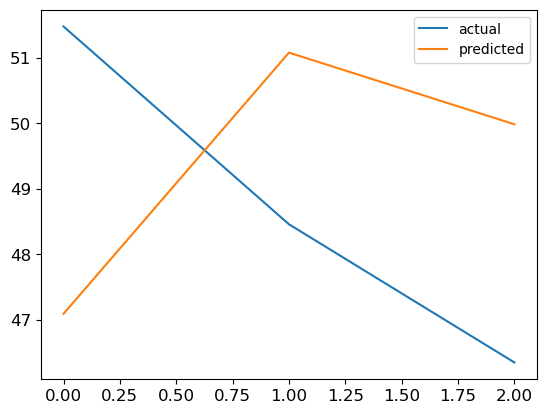

In [44]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Simple RNN

Simplest recurrent neural network

In [45]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [46]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 607ms/step - loss: 1.8904
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 1.6941
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 1.5192
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 1.3741
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 1.2334
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0994
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.9728
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.8513
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7370
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6321
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5383
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4558
Epoch 13/100
1/1 [==============================] - 0s 4ms

### Predictions

In [47]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 156ms/step


In [48]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [49]:
comparison

,actual,predicted
0,51.480000,50.620529
1,48.459999,50.159382
2,46.349998,50.300621


In [50]:
mse_rnn = mean_squared_error(comparison['actual'], comparison['predicted'])

In [51]:
performance = pd.concat([performance, pd.DataFrame({'model':"Simple RNN", 'MSE': mse_rnn}, index=[0])])
performance

,model,MSE
0,Cross NN,13.113420
0,Simple RNN,6.411338


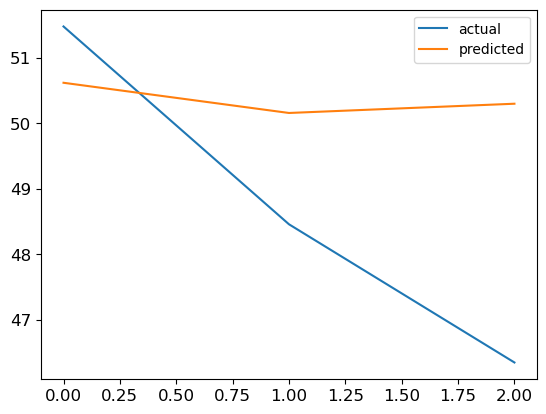

In [52]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with more layers

**Be careful: when stacking RNN layers, you have to set "return_sequences" to True. This enables the layer to send a "sequence" of values to the next layer -- jut like how it uses a sequence of values for training. However, if the output of RNN is sent to a DENSE layer, then a single value should be sent. That's why there is no "return sequences" right before DENSE layers.**

In [53]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [54]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.1867
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0740
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.9741
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.8958
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8295
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7711
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7157
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6622
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6115
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5631
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5145
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4718
Epoch 13/100
1/1 [==============================] - 0s 7ms/ste

### Predictions

In [55]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 225ms/step


In [56]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [57]:
comparison

,actual,predicted
0,51.480000,50.332737
1,48.459999,50.520363
2,46.349998,49.610912


In [58]:
mse_rnn_ml = mean_squared_error(comparison['actual'], comparison['predicted'])

In [59]:
performance = pd.concat([performance, pd.DataFrame({'model':"Simple RNN more layers", 'MSE': mse_rnn_ml}, index=[0])])
performance

,model,MSE
0,Cross NN,13.113420
0,Simple RNN,6.411338
0,Simple RNN more layers,5.398291


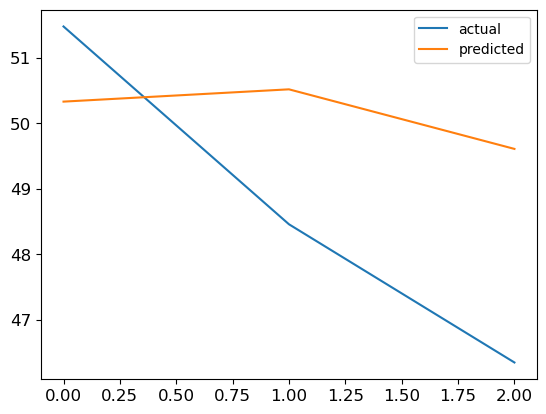

In [60]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with one layer

In [61]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [62]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 877ms/step - loss: 1.5743
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 1.5462
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.5185
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 1.4913
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 1.4646
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 1.4383
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 1.4124
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 1.3869
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 1.3372
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3129
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 1.2889
Epoch 13/100
1/1 [==============================] - 0s 7ms/

### Predictions

In [63]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 166ms/step


In [64]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [65]:
mse_lstm = mean_squared_error(comparison['actual'], comparison['predicted'])

In [66]:
performance = pd.concat([performance, pd.DataFrame({'model':"LSTM one layers", 'MSE': mse_lstm}, index=[0])])
performance

,model,MSE
0,Cross NN,13.113420
0,Simple RNN,6.411338
0,Simple RNN more layers,5.398291
0,LSTM one layers,5.880372


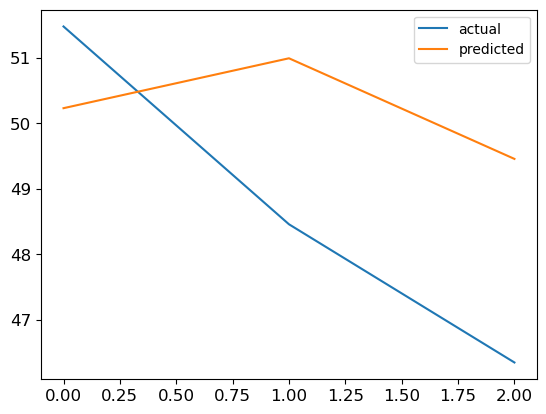

In [67]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [68]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [69]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.3436
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2802
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2194
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 1.1610
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 1.1045
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0497
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.9962
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.9439
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.8927
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.8426
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7937
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7462
Epoch 13/100
1/1 [==============================] - 0s 9ms/st

### Predictions

In [70]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 623ms/step


In [71]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [72]:
mse_lstm_ml = mean_squared_error(comparison['actual'], comparison['predicted'])

In [73]:
performance = pd.concat([performance, pd.DataFrame({'model':"LSTM more layers", 'MSE': mse_lstm_ml}, index=[0])])
performance

,model,MSE
0,Cross NN,13.113420
0,Simple RNN,6.411338
0,Simple RNN more layers,5.398291
0,LSTM one layers,5.880372
0,LSTM more layers,7.065825


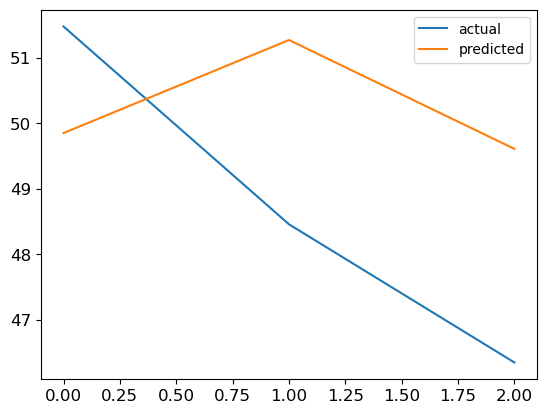

In [74]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [75]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [76]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.2804
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 1.1755
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 1.1032
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 1.0434
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 0.9881
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 0.9401
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.8963
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.8536
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 0.8132
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7749
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7389
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7050
Epoch 13/100
1/1 [==============================] - 

### Predictions

In [77]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 264ms/step


In [78]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [79]:
mse_gru = mean_squared_error(comparison['actual'], comparison['predicted'])

In [80]:
performance = pd.concat([performance, pd.DataFrame({'model':"GRU", 'MSE': mse_gru}, index=[0])])
performance

,model,MSE
0,Cross NN,13.113420
0,Simple RNN,6.411338
0,Simple RNN more layers,5.398291
0,LSTM one layers,5.880372
0,LSTM more layers,7.065825
0,GRU,6.915461


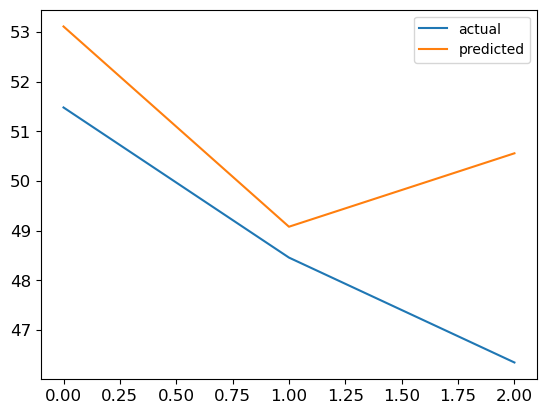

In [81]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

### Last Layer: GRU (you can change it to SimpleRNN or LSTM as well)

In [82]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=1, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.Conv1D(filters=20, kernel_size=1, strides=1, padding="valid"),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])


In [83]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.4422
Epoch 2/100
1/1 [==============================] - 0s 85ms/step - loss: 1.3801
Epoch 3/100
1/1 [==============================] - 0s 91ms/step - loss: 1.3201
Epoch 4/100
1/1 [==============================] - 0s 48ms/step - loss: 1.2668
Epoch 5/100
1/1 [==============================] - 0s 81ms/step - loss: 1.2173
Epoch 6/100
1/1 [==============================] - 0s 49ms/step - loss: 1.1699
Epoch 7/100
1/1 [==============================] - 0s 80ms/step - loss: 1.1272
Epoch 8/100
1/1 [==============================] - 0s 82ms/step - loss: 1.0873
Epoch 9/100
1/1 [==============================] - 0s 47ms/step - loss: 1.0470
Epoch 10/100
1/1 [==============================] - 0s 82ms/step - loss: 1.0069
Epoch 11/100
1/1 [==============================] - 0s 82ms/step - loss: 0.9665
Epoch 12/100
1/1 [==============================] - 0s 59ms/step - loss: 0.9250
Epoch 13/100
1/1 [==============================] -

### Predictions

In [84]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 313ms/step


In [85]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [86]:
mse_conv1d = mean_squared_error(comparison['actual'], comparison['predicted'])

In [87]:
performance = pd.concat([performance, pd.DataFrame({'model':"Conv1D", 'MSE': mse_conv1d}, index=[0])])
performance

,model,MSE
0,Cross NN,13.113420
0,Simple RNN,6.411338
0,Simple RNN more layers,5.398291
0,LSTM one layers,5.880372
0,LSTM more layers,7.065825
0,GRU,6.915461
0,Conv1D,3.167561


In [88]:
performance.sort_values(by='MSE')

,model,MSE
0,Conv1D,3.167561
0,Simple RNN more layers,5.398291
0,LSTM one layers,5.880372
0,Simple RNN,6.411338
0,GRU,6.915461
0,LSTM more layers,7.065825
0,Cross NN,13.113420


Since we know that the lower the mse the better the model will be so from the above results we can say that GRU model is better performing model than all.